### Word2Vec with Gensim

### 1. Importing the Libraries

In [8]:
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

### 2. Loading the Corpus

In [9]:
sentences = [
    ['human','interface','computer'],
    ['survey','user','computer','system','response','time'],
    ['eps','user','interface','system'],
    ['system','human','system','eps'],
    ['user','response','time'],
    ['trees'],
    ['graph','trees'],
    ['graph','minors','trees'],
    ['graph','minors','survey']
]

### Training the Word2Vec

In [10]:
model = Word2Vec(sentences=sentences,min_count=1,vector_size=10)

In [11]:
print(model.wv['trees'])

[ 0.07311766  0.05070262  0.06757693  0.00762866  0.06350891 -0.03405366
 -0.00946401  0.05768573 -0.07521638 -0.03936104]


In [12]:
model.wv.similarity('human','computer')

-0.22643761

In [13]:
model.wv.most_similar('computer',topn=10)

[('eps', 0.2914133667945862),
 ('trees', 0.055418092757463455),
 ('minors', 0.04264765605330467),
 ('survey', -0.02176341786980629),
 ('interface', -0.15233564376831055),
 ('time', -0.19863173365592957),
 ('response', -0.217923104763031),
 ('human', -0.22643761336803436),
 ('user', -0.23134341835975647),
 ('graph', -0.5145737528800964)]

### Performing PCA
Implementing the algorithm to reduce the dimesion of vectors

In [14]:
# Returns the word2vec of each word
vectors = [model.wv[word] for word in model.wv.index_to_key]

pca = PCA(n_components=2)
final_vec = pca.fit_transform(vectors)

### Visualising the Word Vectors

In [15]:
final_vec[:,0]

array([-0.1396022 , -0.13269827, -0.05824892, -0.01931258,  0.16813121,
        0.11313036,  0.0522277 , -0.03354481, -0.01486887,  0.12342414,
       -0.02519465, -0.03344312])

In [16]:
final_vec[:,1]

array([ 0.07318126,  0.0348894 , -0.0383951 , -0.11639848,  0.11816454,
       -0.03807047,  0.03809367, -0.10207651, -0.01355424, -0.05953071,
        0.00019733,  0.10349932])

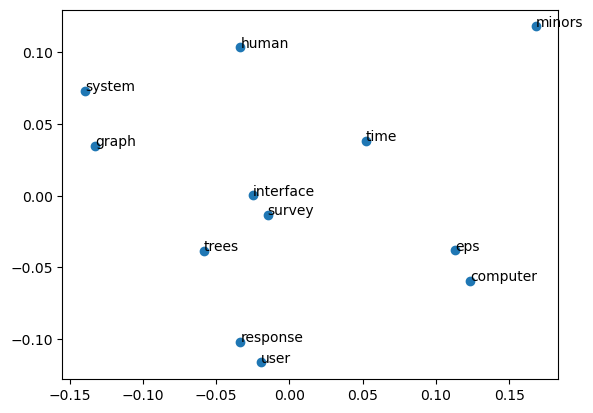

In [21]:
# No of points plotted = No of words in Word2Vec model
plt.scatter(final_vec[:,0],final_vec[:,1])
words = model.wv.index_to_key
for i,word in enumerate(words):
    plt.annotate(word,xy = (final_vec[i][0],final_vec[i][1]))
plt.show()